In [1]:
! pip install pycaret

In [2]:
import pandas as pd

In [3]:
from pycaret.datasets import get_data
#diabetes = get_data('/content/drive/My Drive/Machine Learning/Keggle/Can You Predict Backorders/train.csv')
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/test.csv')

In [22]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
from pycaret.classification import *
exp1 = setup(train, target = 'Survived')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,8905
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 12)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [31]:
#rf = create_model('rf', fold=10)
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.818600,0.000000,0.707200,0.796600,0.748600,0.607700
1,Gradient Boosting Classifier,0.818600,0.867400,0.673500,0.820000,0.738200,0.601900
2,Random Forest Classifier,0.810500,0.842200,0.636100,0.834000,0.718600,0.580300
3,Logistic Regression,0.808900,0.867300,0.719600,0.768600,0.742900,0.591200
4,Light Gradient Boosting Machine,0.807300,0.859900,0.698900,0.774200,0.734000,0.583900
5,CatBoost Classifier,0.804200,0.867300,0.644200,0.806100,0.715700,0.569300
6,Extra Trees Classifier,0.802400,0.852200,0.669300,0.783300,0.720400,0.569500
7,Extreme Gradient Boosting,0.799300,0.856700,0.682100,0.768100,0.722200,0.566100
8,Decision Tree Classifier,0.792900,0.772600,0.686000,0.750700,0.715900,0.553700
9,Ada Boost Classifier,0.792800,0.843900,0.702800,0.750600,0.721500,0.557500


In [33]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8095,0.0,0.7083,0.7727,0.7391,0.5896
1,0.7460,0.0,0.5417,0.7222,0.6190,0.4343
2,0.8571,0.0,0.7500,0.8571,0.8000,0.6897
3,0.8710,0.0,0.8333,0.8333,0.8333,0.7281
4,0.8065,0.0,0.7083,0.7727,0.7391,0.5857
5,0.7903,0.0,0.6667,0.7619,0.7111,0.5477
6,0.8226,0.0,0.7083,0.8095,0.7556,0.6173
7,0.8065,0.0,0.6667,0.8000,0.7273,0.5792
8,0.8065,0.0,0.7500,0.7500,0.7500,0.5921
9,0.8065,0.0,0.6522,0.7895,0.7143,0.5699


In [10]:
dt = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7460,0.7879,0.5417,0.7222,0.6190,0.4343
1,0.7302,0.7949,0.5833,0.6667,0.6222,0.4138
2,0.7619,0.8232,0.7500,0.6667,0.7059,0.5070
3,0.7742,0.8116,0.5217,0.8000,0.6316,0.4790
4,0.7581,0.8246,0.7917,0.6552,0.7170,0.5090
5,0.7903,0.7988,0.7917,0.7037,0.7451,0.5681
6,0.8710,0.8734,0.7500,0.9000,0.8182,0.7195
7,0.8548,0.8432,0.7083,0.8947,0.7907,0.6819
8,0.8548,0.9112,0.8333,0.8000,0.8163,0.6964
9,0.8710,0.8887,0.7500,0.9000,0.8182,0.7195


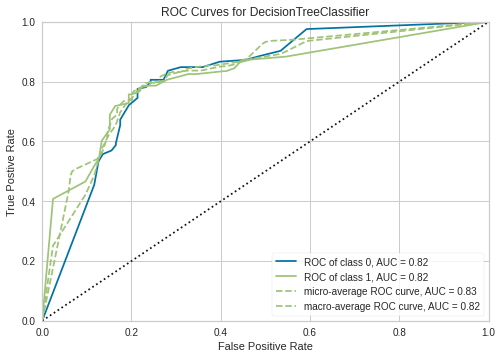

In [11]:
plot_model(dt, plot = 'auc')

In [12]:
predic = predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.7836,0.8174,0.7573,0.7027,0.729,0.5493


In [13]:
predictions = predict_model(dt, data = test)

In [14]:
predictions.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Label', 'Score'],
      dtype='object')

In [15]:
submission.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
predictions = predictions.rename(columns={'Label': 'Survived'})
predictions

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0667
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0.8750
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.0000
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.0000
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.1111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.0556
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1.0000
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.2000
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.0556


In [17]:
predictions = predictions.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Score'], axis=1)

In [18]:
predictions

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [19]:
# Cria e salva arquivo para submissão
predictions.to_csv('submissionDT1.csv',index=False)

In [ ]:
mandar = pd.read_csv('submissionMLP7.csv')

In [ ]:
mandar